In [2]:
import cv2
cv2.__version__

'4.7.0'

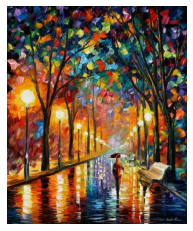

In [55]:
import numpy as np
import matplotlib.pyplot as plt

#import image
img = cv2.imread('/imagesimage3.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert to RGB
plt.axis('off')
plt.imshow(img)

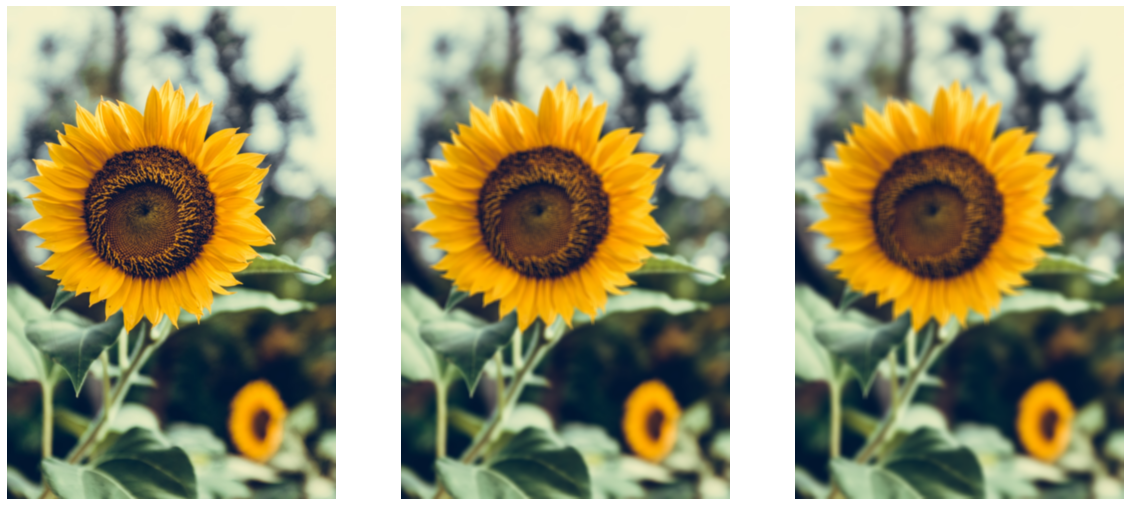

In [30]:
# Blurring
# Goal is to perform noise reduction
# If image is blurred too much, data is lost. But not blurring enough has noisy data
# 4 major techniques to achive blurring effects: Average blurring, Gaussian blurring, median blurring, and bilateral filtering
# All four techniques have a common basic principle, which is applying convolutional operations to the image with a filter (kernel)

# 1. Average Blurring - averages all pixel values in kernel area and replaces the value at the center
kernels = [5, 11, 17] # higher the kernel, greater the blurring because greater the area of pixels being averaged

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,20))
for ind, s in enumerate(kernels):
    img_blurred = cv2.blur(img, ksize = (s,s))
    ax = axs[ind]
    ax.imshow(img_blurred)
    ax.axis('off')

plt.show()
# Gets increasingly blurry


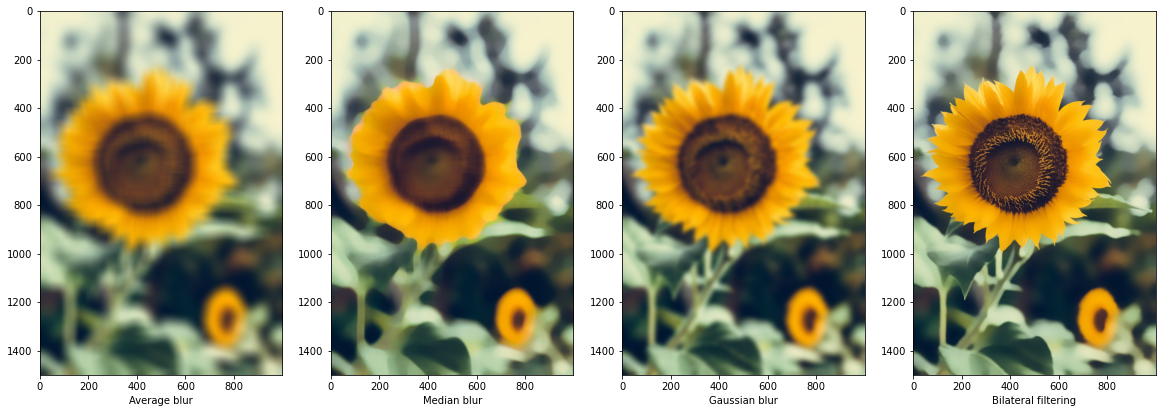

In [36]:
# 2. Medium Blurring, same as average blurring but takes median of kernel
# 3. Gaussian Blurring, using kernel whose values have a Gaussian distribution
# 4. Bilateral filtering - advanced version of Gaussian blurring that disslves noises and ALSO smooths edges
# 4.    requires sigmaSpace and sigmaColor parameters

img_avg = cv2.blur(img, ksize=(51,51))
img_median = cv2.medianBlur(img, 51)
img_gaussian = cv2.GaussianBlur(img, ksize=(51,51), sigmaX = 0)
img_bilateral_filter = cv2.bilateralFilter(img, 51, sigmaSpace = 75, sigmaColor = 75)
images = [img_avg, img_median, img_gaussian, img_bilateral_filter]
image_names = ['Average blur', 'Median blur', 'Gaussian blur', 'Bilateral filtering']
fig, axs = plt.subplots(nrows = 1, ncols=4, figsize = (20,20))

for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p)
    # ax.axis('off')
    ax.set_xlabel(image_names[ind])
plt.show()

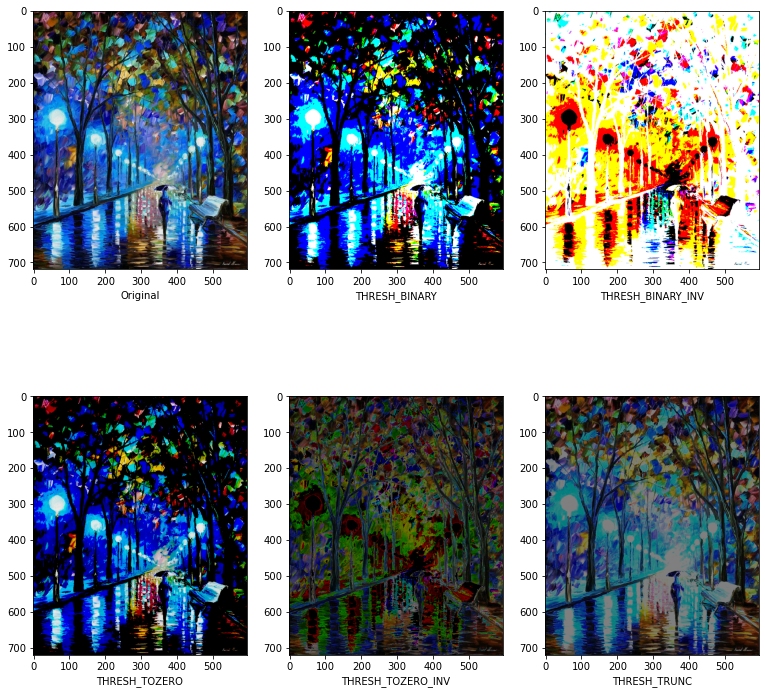

In [69]:
# Thresholding - transoforms images into binary images.
# There are five different types of thresholding: Binary, the inverse of Binary, Threshold to zero, the inverse of Threshold to Zero, and Threshold truncation.

img = cv2.imread('/imagesimage.jpeg')

_, thresh_0 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, thresh_1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, thresh_2 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, thresh_3 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
_, thresh_4 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

images = [img, thresh_0, thresh_1, thresh_2, thresh_3, thresh_4]
image_names = ['Original', 'THRESH_BINARY', 'THRESH_BINARY_INV', 'THRESH_TOZERO', 'THRESH_TOZERO_INV', 'THRESH_TRUNC']
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (13,13))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p)
    ax.set_xlabel(image_names[ind])

plt.show()
# notice how binary and inverse are always opposite, the threshold condition is the same for both but the values have been switched


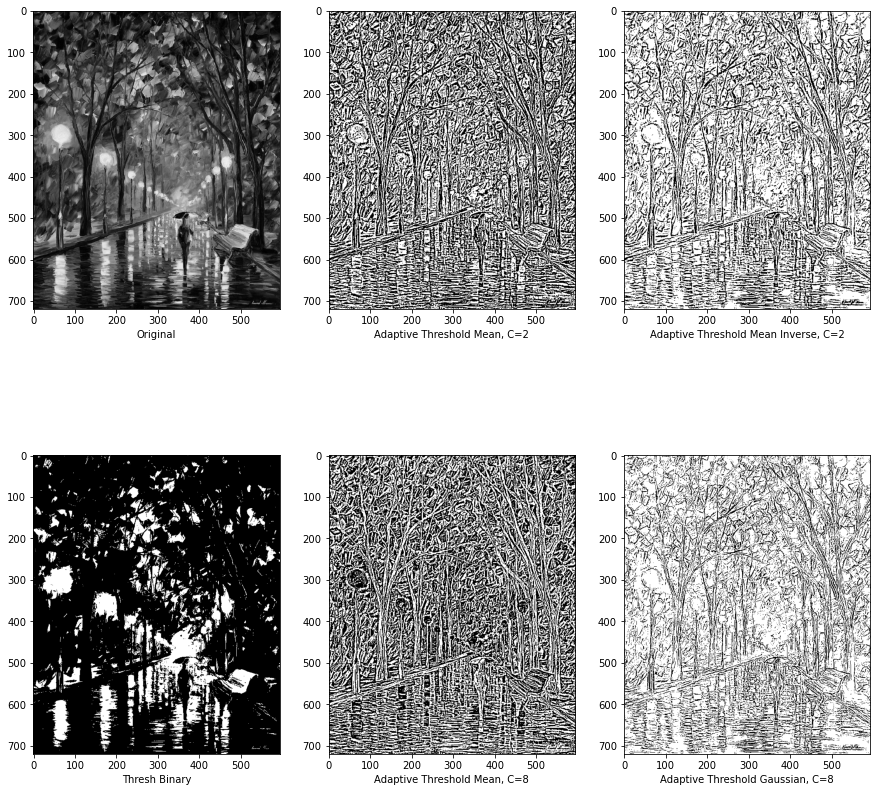

In [72]:
# Adaptive thresholding is using different thresholds for each part of an image
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Adaptive Thresholding
_, thresh_binary = cv2.threshold(img, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)
adap_mean_2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 2)
adap_mean_2_inv = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 7, 2)
adap_mean_8 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 8)
adap_gaussian_8 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 8)

images = [img, thresh_binary, adap_mean_2, adap_mean_2_inv, adap_mean_8, adap_gaussian_8]
image_names = ['Original', 'Thresh Binary', 'Adaptive Threshold Mean, C=2', 'Adaptive Threshold Mean, C=8', 'Adaptive Threshold Mean Inverse, C=2', 'Adaptive Threshold Gaussian, C=8']


fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind%2, ind//2]
    ax.imshow(p, cmap = 'gray')
    # ax.axis('off')
    ax.set_xlabel(image_names[ind])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


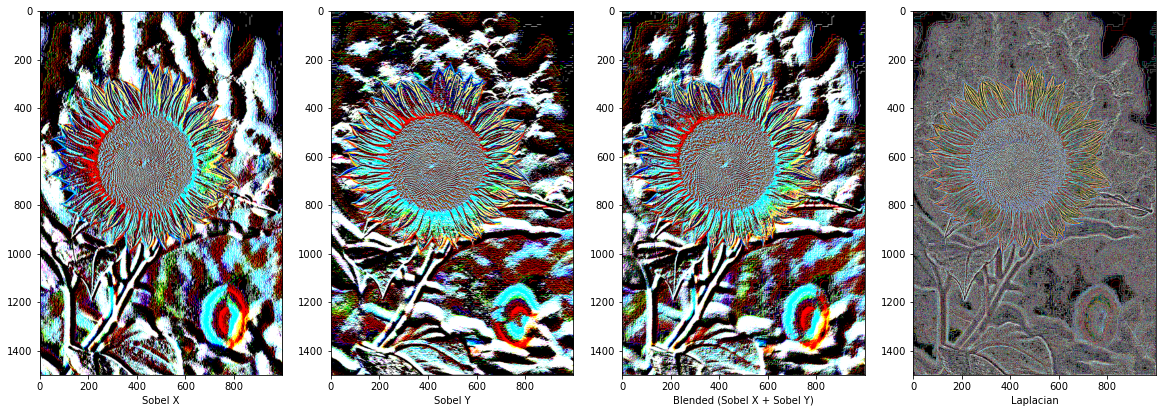

In [80]:
# Gradient - geometrically represents the slope of the graph of a function with multi-variables. 
# As it is a vector-valued function, it takes a direction and a magnitude as its components.
# Image gradient represents directional changes in the intensity or color mode and we can use this concept for locating edges.
img = cv2.imread('/imagesimage3.jpeg')

# when dx = 1, the operator calculates derivatives of pixel values along horizontal direction to make a filter
# works respectivelt with dy in the vertical direction
sobel_x = cv2.Sobel(img, cv2.CV_64F, dx=1, dy=0, ksize=0) # sobel_x and y interchange values for dx and dy
sobel_y = cv2.Sobel(img, cv2.CV_64F, dx=0, dy=1, ksize=0)
blended = cv2.addWeighted(src1=sobel_x, alpha=0.5, src2=sobel_y, beta=0.5, gamma=0) # addWeighted calculates sum of filters
laplacian = cv2.Laplacian(img, cv2.CV_64F) # 2nd derivative

images = [sobel_x, sobel_y, blended, laplacian]
image_names = ['Sobel X', 'Sobel Y', 'Blended (Sobel X + Sobel Y)', 'Laplacian']
plt.figure(figsize = (20, 20))
for i in range(4):
    plt.subplot(1, 4, i+1).set_xlabel(image_names[i])
    plt.imshow(images[i], cmap = 'gray')
    # plt.axis('off')
    
plt.show()
# sobel x indicates edges in vertical direction
# sobel y indicates edges  horizontal direction
# blended and laplacian show edges in both direction

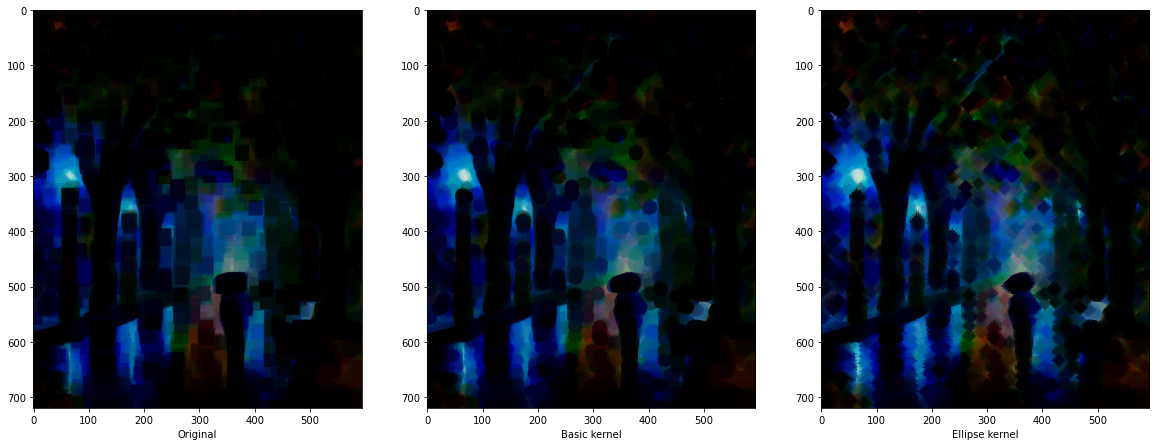

In [87]:
# Morphological transformations - manipulate figures of images by filtering
# Erosion is the tecnqiue for shrinking figures and it's usually processed in a grayscale
img = cv2.imread('/imagesimage.jpeg')
kernel_0 = np.ones((9,9), np.uint8)
kernel_1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9,9))
kernel_2 = cv2.getStructuringElement(cv2.MORPH_CROSS, (9,9))

kernels = [kernel_0, kernel_1, kernel_2]
kernel_names = ['Original', 'Basic kernel', 'Ellipse kernel', 'Cross kernel']

plt.figure(figsize=(20,20))
for i in range(3):
    img_copy = img.copy()
    img_copy = cv2.erode(img_copy, kernels[i], iterations=3)
    plt.subplot(1,3, i+1).set_xlabel(kernel_names[i])
    plt.imshow(img_copy)
plt.show()    

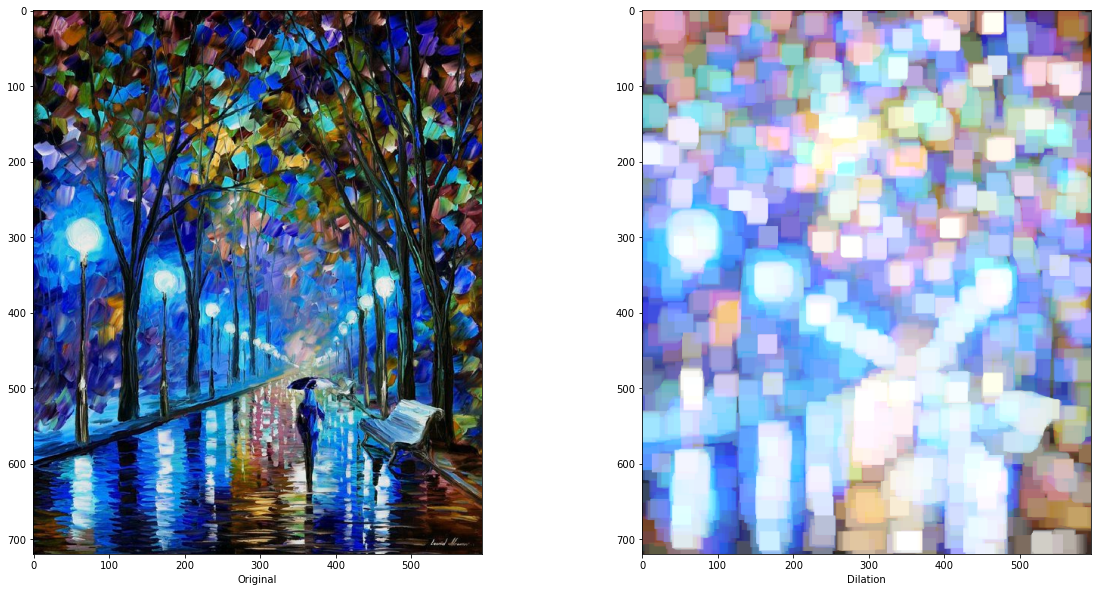

In [92]:
# Dilation - opposite to erosion, makes objects expand
kernel = np.ones((9, 9), np.uint8)
img = cv2.imread('/imagesimage.jpeg')
img_dilate = cv2.dilate(img, kernel, iterations = 3)
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1).set_xlabel('Original')
plt.imshow(img, cmap="gray")
plt.subplot(1, 2, 2).set_xlabel('Dilation')
plt.imshow(img_dilate, cmap="gray")
plt.show()

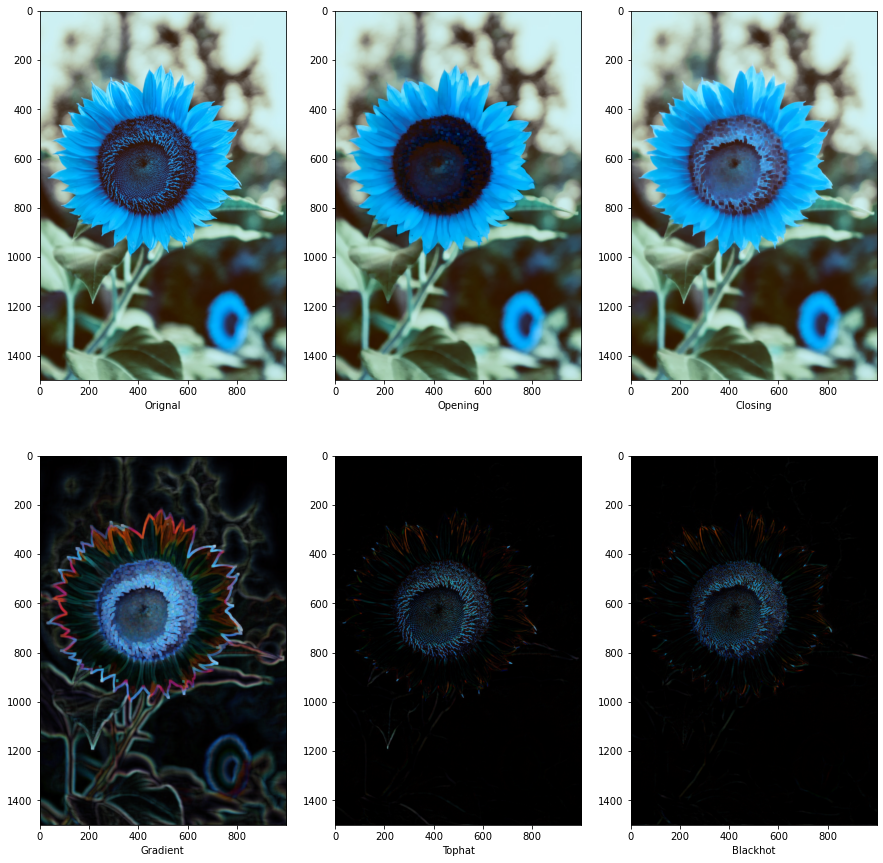

In [97]:
# Mixed techniques - useful for detecting overall contour of a figure and opening is suitable to detect subpatterns
# Opening - erosion and then dilation
# Closing - dilation and then erosion
img = cv2.imread('/imagesimage3.jpeg')
kernel = np.ones((9, 9), np.uint8)
img_open = cv2.morphologyEx(img,kernel=kernel, op= cv2.MORPH_OPEN)
img_close = cv2.morphologyEx(img, kernel=kernel, op= cv2.MORPH_CLOSE)
img_grad = cv2.morphologyEx(img, kernel=kernel, op= cv2.MORPH_GRADIENT)
img_tophat = cv2.morphologyEx(img, kernel=kernel, op= cv2.MORPH_TOPHAT)
img_blackhat = cv2.morphologyEx(img, kernel=kernel, op= cv2.MORPH_BLACKHAT)
# Plot the images
images = [img, img_open, img_close, img_grad, 
          img_tophat, img_blackhat]
image_names = ['Orignal', 'Opening', 'Closing', 'Gradient', 'Tophat', 'Blackhot']
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 15))
for ind, p in enumerate(images):
    ax = axs[ind//3, ind%3]
    ax.imshow(p, cmap = 'gray')
    ax.set_xlabel(image_names[ind])
plt.show()